In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Basics of Matplot

- Matplot graphs data onto __Figure__ s with 1+ __Axes__
- First let's use pyplot.subplots to create a figure and Axes.plot to graph some data

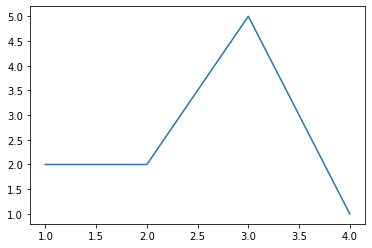

In [30]:
# Create a figure
fig, ax = plt.subplots()
# Plot data
ax.plot([1,2,3,4],[2,2,5,1])

## Components
### Figure
- A figure is the entire drawing area, it includes axes and artists and subfigures
- They are created with the figure() method and the subplots() method

<Figure size 432x288 with 0 Axes>

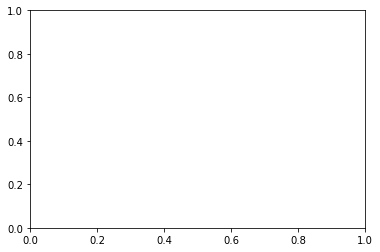

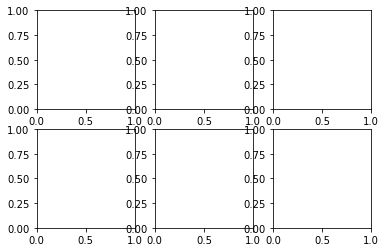

In [31]:
# Create a figure with no axes
fig = plt.figure()
# Create a figure with single Axes
fig = plt.subplots()
# Create a figure with a 2 by 3 grid of Axes
fig = plt.subplots(2,3)

### Axes
- It's a region where we can plot data with 2/3 __Axis__ objects
- It also has a title and label for the axis objects

### Axis

- They control the scale and the markings (also called ticks) of an axis

### Artist

- Everything visible on the figure

## What to do if you don't have a simple np array

- Plotting methods expect np.array type objects, array-like objects may not always work as you expect them to
- Common convention is to convert them to np.array objects using np.asarray()
- You can mostly use addressable objects like dicts for plotting - here's an example of that

Text(0, 0.5, 'b')

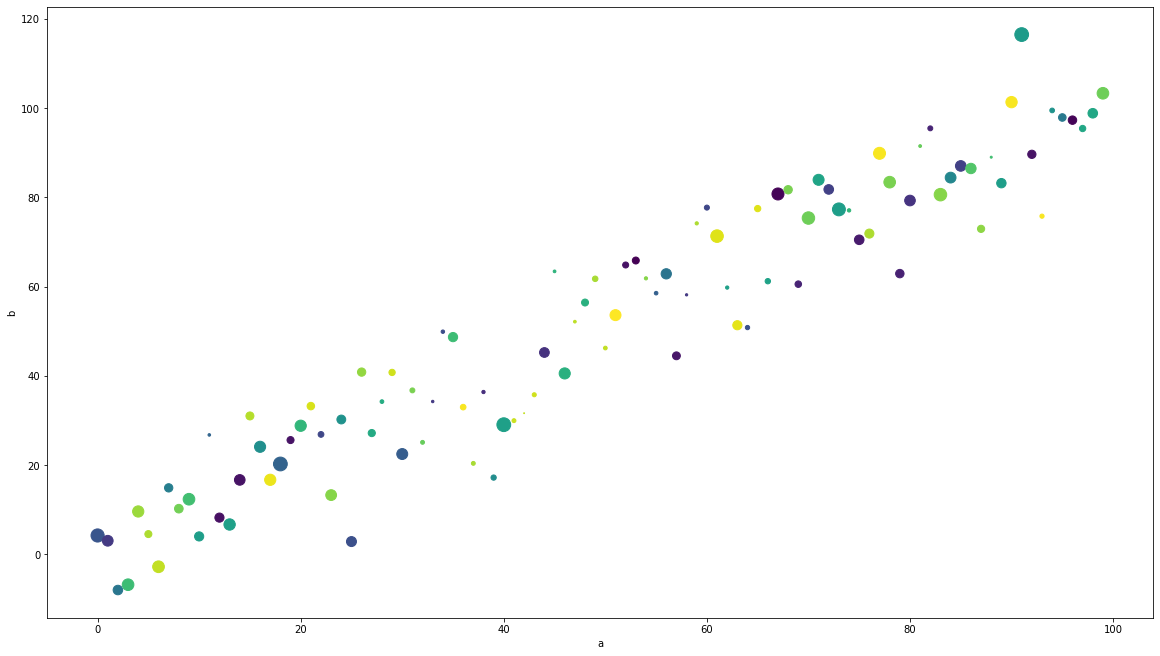

In [32]:
np.random.seed(324234)
data = {'a': np.arange(100),
        'c': np.random.randint(0,100,100),
        'd': np.random.randn(100)}
data['b'] = data['a'] + 10*np.random.randn(100)
data['d'] = np.abs(data['d']) * 100

fig,ax = plt.subplots(figsize = (16,9),layout='constrained')
ax.scatter('a','b',c='c',s='d',data=data)
ax.set_xlabel('a')
ax.set_ylabel('b')

# Generic Helper Function
- If you plot the same plot frequently use a helper function in this format - 

In [33]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

## Style

- There are various ways to style your graph, changing the color, linewidth and linestyle of the artist.

## A bit more detail on the plot() method

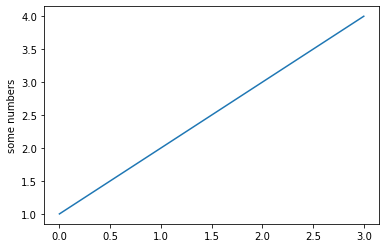

In [34]:
# Plotting with a single set of values
plt.plot([1,2,3,4])
plt.ylabel("some numbers")
plt.show()

- In the above case, x values were selected automatically - like indexing, they began at 0, and increased by 1 till the number of elements was 4.

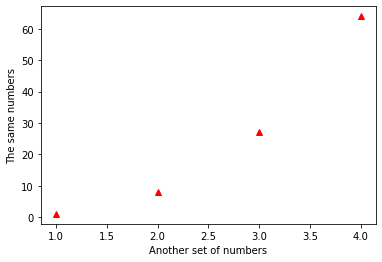

In [35]:
# Plotting with both sets of values
plt.plot([1,2,3,4],[1,8,27,64],'r^')
plt.ylabel("The same numbers")
plt.xlabel("Another set of numbers")
plt.show()

- This time, we gave the plot() method two lists, the first one was assumed to be x values while the second set was assumed to be y values
- The third argument 'r^' stands for red triangles and is a styling option. You can try various things, green squares, dashed lines, etc.
- But python lists are pretty inefficient, and normally we'd use numpy arrays so let's see some examples with them

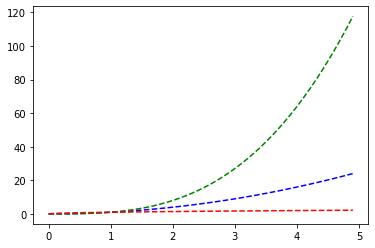

In [36]:
x = np.arange(0,5,0.1)
plt.plot(x,x**2,'b--',x,x**3,'g--',x,x**0.5,'r--')
plt.show()

- Numpy also has multi-dimensional arrays which can be accessed using strings, matplotlib has intrinsic support for this with the data argument, whose usage we saw earlier under 'What to do if you don't have a simple np array'

## Multiple Figures

- There are often situations where one may like to use more than one plot to demonstrate data, let's see how to accomplish that

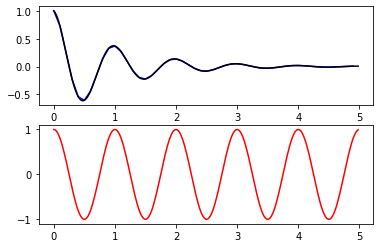

In [37]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'b-', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r-')
plt.show()

- Subplots are how we create more than one plot to work on. The argument of the subplot is simply number of rows, number of columns and plot number. We can ignore the commas if the number of plots is less than 10
- Positioning of the axes can be done manually using the axes() method which takes in coordinates to know how you would like to position the axes
- You can also go one more step ahead and create more than one figure, let's see how to do the same thing but using multiple figures instead of subplots.

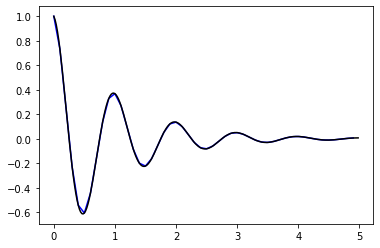

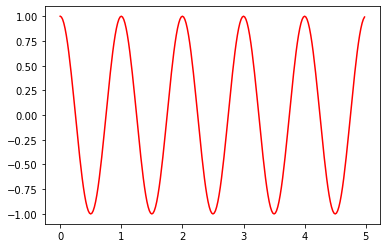

In [38]:
def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.plot(t1, f(t1), 'b-', t2, f(t2), 'k')

plt.figure(2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r-')
plt.show()

## Text in a plot
- We can add text with Tex support, and at any place on the plot
- The text() method is used, which takes the coordinates (in terms of the axes) and the text you want to add
- To use Tex, use raw strings with dollar signs before and after the Tex equation, like this - `r'$\sigma=15$'`
- To annotate, use the annotate() method, which takes the text, the position of the annotation, the position of the text and arrow properties as arguments

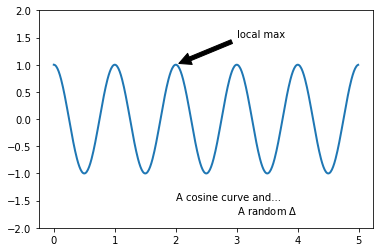

In [39]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.text(2,-1.5,'A cosine curve and...')
plt.text(3,-1.75,r'A random $\Delta$')
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

## Non-linear graphs

- Naturally, there is support for other scales like logarithmic
- Use the xscale() and yscale() methods to accomplish this

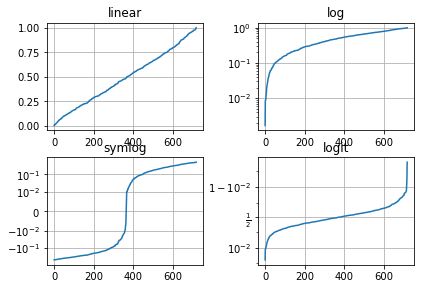

In [40]:
# Fixing random state for reproducibility
np.random.seed(196801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.5, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()